# Agent 3

Develop the code for an agent that emulates the intuitive policy of:  *Turn up the heat really hot, then turn it down low to accelerate the heating of the griddle*

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import GridSimulator

## Develop the methodology of hot then cold

This agent is supposed to turn up the *hot side* to a specific temperature (`temperatureHot`) for a specific amount of time (`timeHot`).  After that time, turn the temperature down to a specific temperature (`temperatureCold`) and complete the simulation and score the results

In [18]:
temperatureHot = 300
temperatureCold = 100
timeHot = 60

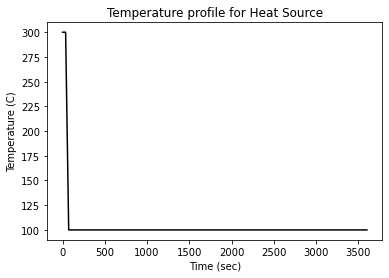

In [19]:
timeTest = np.linspace(0, 3600, 100)

temperatureHeatSourceProfile = np.ones(timeTest.shape)*temperatureCold

isHot = timeTest < timeHot
temperatureHeatSourceProfile[isHot] = temperatureHot

plt.figure()
plt.plot(timeTest, temperatureHeatSourceProfile, '-k')
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (C)")
plt.title("Temperature profile for Heat Source")
plt.show()

#  Test the Agent Class

Make sure that temperature vs. time looks right for the heater and the simulator

-1.0


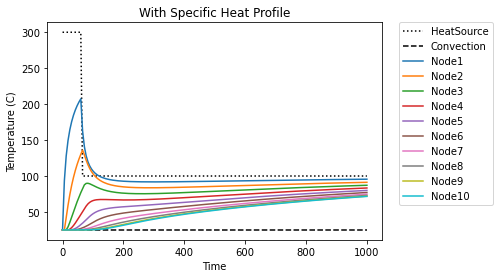

In [20]:
import StableBaselinesAgent3 as sb3

numberNodes = 10
thicknessTotal = 0.1
widthBar = 0.003
thicknessBar = 0.003

materialDensity = 7800
materialSpecificHeat = 500
materialThermalConductivity = 16.2

convectionCoefficient = 4
convectionTemperature = 25

temperatureHeatSource = 25
temperatureInitialIsothermal = 25
doesSurfaceTemperatureAllowConvection = False

objHeatSimulator = GridSimulator.ClassHeatSimulation()
objHeatSimulator.SetSize(widthBar,thicknessBar)
objHeatSimulator.SetNodes(numberNodes,thicknessTotal)
objHeatSimulator.SetMaterialProperties(materialDensity,materialSpecificHeat,materialThermalConductivity)
objHeatSimulator.SetConvectionProperties(convectionCoefficient,convectionTemperature)
objHeatSimulator.EnableSurfaceHeatTransfer(doesSurfaceTemperatureAllowConvection)
objHeatSimulator.SetHeatSource(temperatureHeatSource)
objHeatSimulator.SetInitalTemp(temperatureInitialIsothermal)
objHeatSimulator.UpdatePropertiesTable()

timeTotal = 1000

objAgent = sb3.ClassAgent3()
score = objAgent.runSimulation(timeTotal, timeHot, temperatureHot, temperatureCold, objHeatSimulator)
print(score)
objAgent.objHeatSimulator.GraphResults("With Specific Heat Profile")


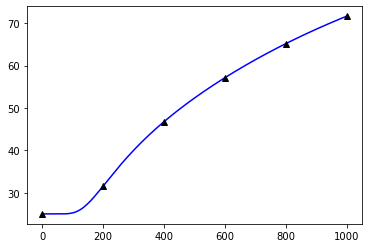

In [21]:

plt.figure()
plt.plot(objAgent.objHeatSimulator.AllTemp.Time, objAgent.objHeatSimulator.AllTemp.Node10, '-b')
plt.plot(objAgent.timeCoarse, objAgent.temperatureCoarse, '^k')
plt.show()

-0.2986167893158836


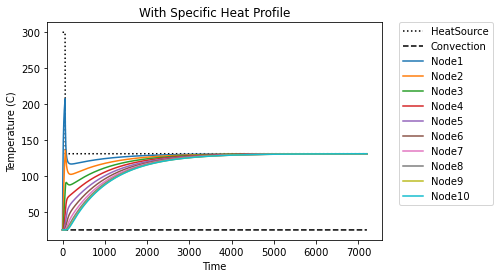

In [22]:
numberNodes = 10
thicknessTotal = 0.1
widthBar = 0.003
thicknessBar = 0.003

materialDensity = 7800
materialSpecificHeat = 500
materialThermalConductivity = 16.2

convectionCoefficient = 4
convectionTemperature = 25

temperatureHeatSource = 25
temperatureInitialIsothermal = 25
doesSurfaceTemperatureAllowConvection = False

objHeatSimulator = GridSimulator.ClassHeatSimulation()
objHeatSimulator.SetSize(widthBar,thicknessBar)
objHeatSimulator.SetNodes(numberNodes,thicknessTotal)
objHeatSimulator.SetMaterialProperties(materialDensity,materialSpecificHeat,materialThermalConductivity)
objHeatSimulator.SetConvectionProperties(convectionCoefficient,convectionTemperature)
objHeatSimulator.EnableSurfaceHeatTransfer(doesSurfaceTemperatureAllowConvection)
objHeatSimulator.SetHeatSource(temperatureHeatSource)
objHeatSimulator.SetInitalTemp(temperatureInitialIsothermal)
objHeatSimulator.UpdatePropertiesTable()

timeTotal = 7200

objAgent = sb3.ClassAgent3()
score = objAgent.runSimulation(timeTotal, timeHot, temperatureHot, 131, objHeatSimulator)
print(score)
objAgent.objHeatSimulator.GraphResults("With Specific Heat Profile")

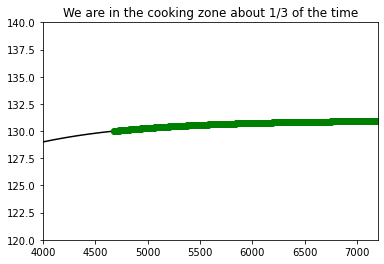

In [23]:
plt.figure()
plt.plot(objAgent.objHeatSimulator.AllTemp.Time, \
         objAgent.objHeatSimulator.AllTemp.Node10, \
         '-k')

isGoodForCooking = (objAgent.objHeatSimulator.AllTemp.Node10 > 130) & \
    (objAgent.objHeatSimulator.AllTemp.Node10 < 135)

plt.plot(objAgent.objHeatSimulator.AllTemp.Time[isGoodForCooking], \
         objAgent.objHeatSimulator.AllTemp.Node10[isGoodForCooking], \
         'og')

plt.ylim(120, 140)
plt.xlim(4000, 7200)
plt.title("We are in the cooking zone about 1/3 of the time")
plt.show()

-0.9529474391382584


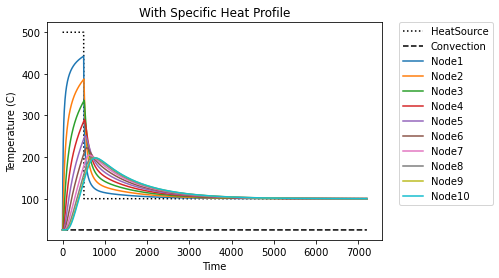

In [24]:
objAgent = sb3.ClassAgent3()
score = objAgent.runSimulation(timeTotal, 500, 500, 100, objHeatSimulator)
print(score)
objAgent.objHeatSimulator.GraphResults("With Specific Heat Profile")

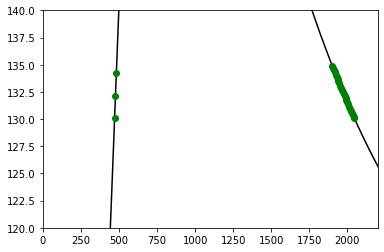

In [25]:
plt.figure()
plt.plot(objAgent.objHeatSimulator.AllTemp.Time, \
         objAgent.objHeatSimulator.AllTemp.Node10, \
         '-k')

isGoodForCooking = (objAgent.objHeatSimulator.AllTemp.Node10 > 130) & \
    (objAgent.objHeatSimulator.AllTemp.Node10 < 135)

plt.plot(objAgent.objHeatSimulator.AllTemp.Time[isGoodForCooking], \
         objAgent.objHeatSimulator.AllTemp.Node10[isGoodForCooking], \
         'og')

plt.ylim(120, 140)
plt.xlim(0, 2200)
plt.show()